### Part-1 : Knowing the graph of the sigmoid function is the following, answer the following questions.

1. Why is the output of σ in the interval (0, 1)?
 
Answer : The sigmoid function (σ) is defined as σ(z) = 1/1 + e^−z, where it takes any real number (z) and it transforms it into a value between 0 and 1. It is utilized in binary classification scenarios, where the output is construed as a probability. This probability denotes the likelihood that an input data point belongs to a specific class. Because probabilities must exist within the range of 0 to 1, the sigmoid function guarantees adherence to this constraint.
 
 
2. Why the output of σ cannot equal 0 or 1?
 
Answer : The sigmoid function's inability to reach exactly 0 or 1 has mathematical implications. When z decreases to negative infinity, e^−z becomes very large, causing the denominator to increase significantly. As a result, the fraction nears 0. Conversely, when z increases to positive infinity, e^−z decreases markedly, resulting in a fraction approaching 1. However, these values are never exactly reached, which is advantageous for the logistic regression model as it prevents extreme predictions.
 
 
3. For what value of z is σ(z)=0.5?
 
Answer : In logistic regression, when the input to the sigmoid function is 0, the output is 0.5. This indicates that the model is uncertain about predicting either class 0 or class 1.
 
4. Show that (z)=σ(z)⋅(1−σ(z))

Answer : 
    
The sigmoid function σ(z) is defined as: σ(z)= 1/1+e^-z
 
Let u=1+e^-z, then σ(z)= 1/u. According to the chain rule,
σ′(z)= -(1/u^2).(du/dz)
 
Now, derivative of u with respect to z is,
du/dz = d/dz(1+e^-z)
du/dz = -e^-z 
therefore,
σ′(z)= -[1/(1+e^-z)^2].(-e^-z)
 
simplifying the expression,
σ′(z)= (e^-z)/[(1+e^-z)^2]
 
expressing σ(z) in terms of e^−z,
σ(z)= [1/(1+e^-z)].(e^−z/e^-z)
σ(z)= (e^-z)/(1+e^-z)
 
substituting σ(z) back into σ′(z),
σ′(z)= (e^-z)/[(1+e^-z)^2]
     = [(e^-z)/(1+e^-z)].[1/(1+e^-z)]
σ′(z)= σ(z)⋅(1-σ(z))

### Part-2 : Use HR.csv data set and consider column ”left” to be the target variable with ”1” meaning the person left the company and ”0” meaning that the person did not leave the company.

#### a. Investigate using various graphs/charts how given features affect this target variable

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


In [2]:
hr_dataset = pd.read_csv('HR_Employee_Data.csv')
hr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Emp_Id                 14999 non-null  object
 1   satisfaction_level     14999 non-null  object
 2   last_evaluation        14999 non-null  object
 3   number_project         14999 non-null  int64 
 4   average_montly_hours   14999 non-null  int64 
 5   time_spend_company     14999 non-null  int64 
 6   Work_accident          14999 non-null  int64 
 7   left                   14999 non-null  int64 
 8   promotion_last_5years  14999 non-null  int64 
 9   Department             14999 non-null  object
 10  salary                 14999 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.3+ MB


In [3]:
#Since percentages are stored as data type -object, we need to convert them to numerical values
#for calculations or plotting

hr_dataset['satisfaction_level']=hr_dataset['satisfaction_level'].str.replace(r'%', r'.0').astype('float') / 100 #convert percentages into decimals
hr_dataset['last_evaluation']=hr_dataset['last_evaluation'].str.replace(r'%', r'.0').astype('float') / 100 #convert percentages into decimals
hr_dataset.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr_dataset.shape

(14999, 11)

In [5]:
hr_dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
hr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 14999 non-null  object 
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


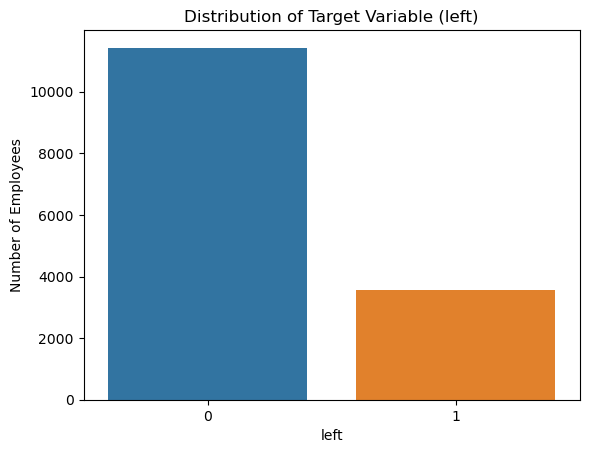

In [7]:
# Visualize the target variable distribution
sns.countplot(x='left', data=hr_dataset)
plt.ylabel("Number of Employees")
plt.title('Distribution of Target Variable (left)')
plt.show()

/Users/rohitkumbar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rohitkumbar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rohitkumbar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rohitkumbar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

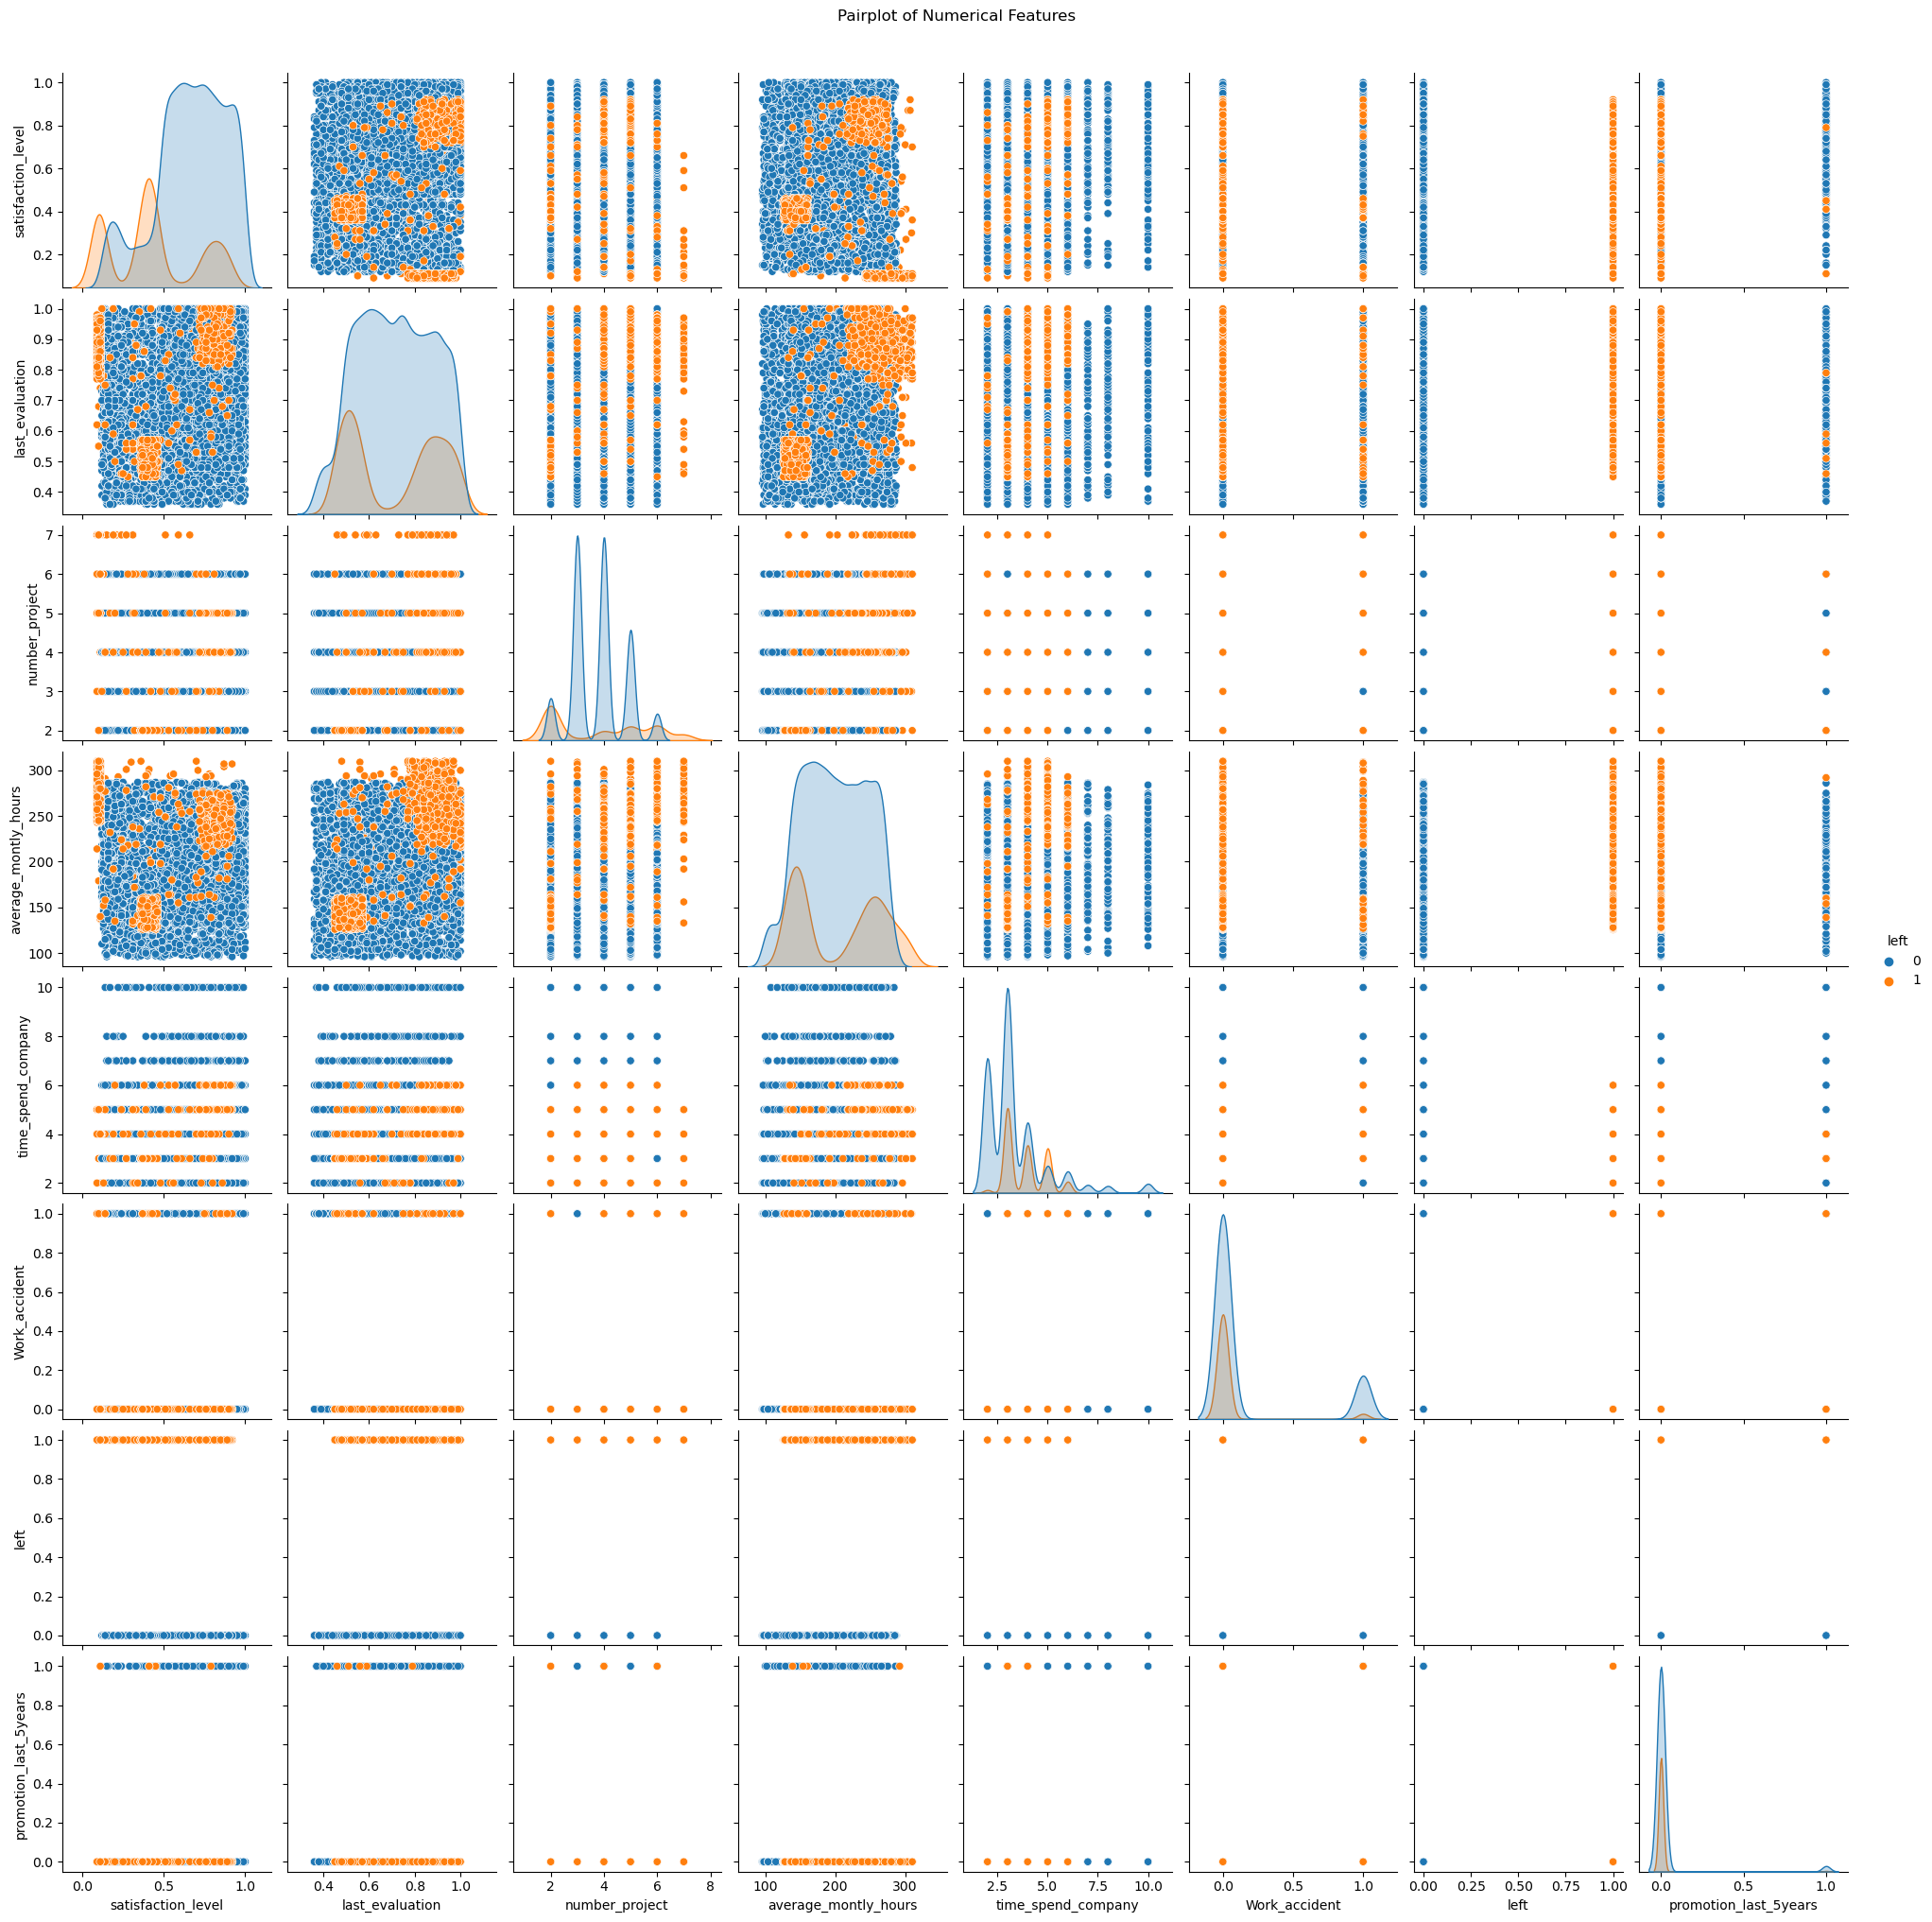

In [8]:
# Investigate numerical features
numerical_features = hr_dataset.select_dtypes(include=['int64','float64']).columns

# Pairplot for numerical features
sns.pairplot(hr_dataset, hue='left', vars=numerical_features)
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

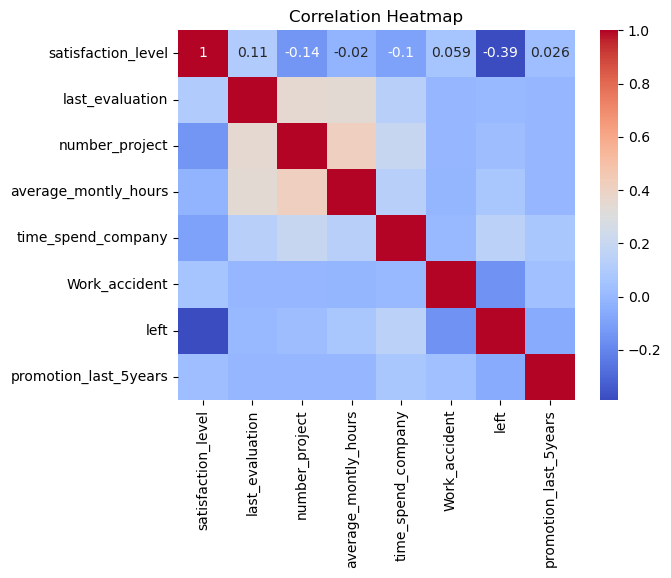

In [9]:
# Select only numeric columns
numeric_columns = hr_dataset.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = hr_dataset[numeric_columns].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

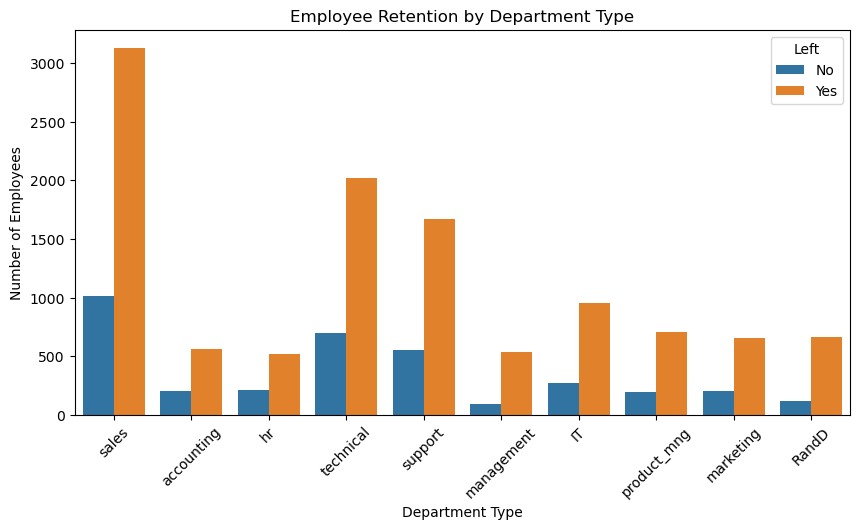

In [10]:
# Investigate categorical features

# Convert the 'left' column to string type to plot the countplot for Department and salary vs Left employees
hr_dataset['left'] = hr_dataset['left'].astype(str)

plt.figure(figsize=(10, 5))
sns.countplot(x="Department", hue="left", data=hr_dataset) #plot deptartment vs number of employees
plt.title("Employee Retention by Department Type")
plt.xlabel("Department Type")
plt.ylabel("Number of Employees")
plt.legend(title="Left", labels=["No", "Yes"])
plt.xticks(rotation=45)
plt.show()

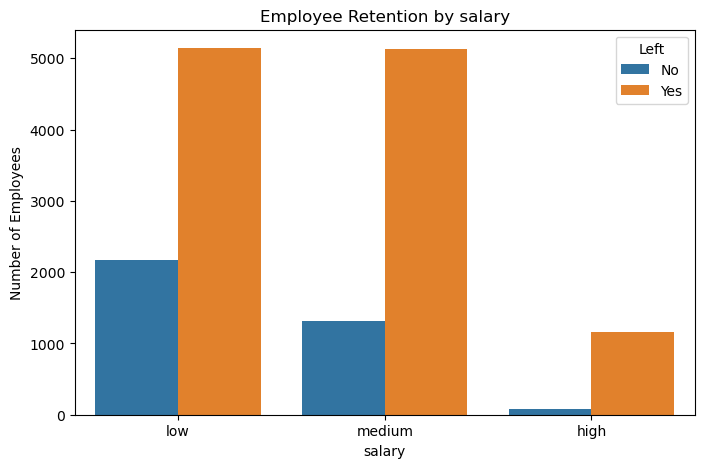

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x="salary", hue="left", data=hr_dataset) #plot number of projects vs. employees who left
plt.title("Employee Retention by salary")
plt.xlabel("salary")
plt.ylabel("Number of Employees")
plt.legend(title="Left", labels=["No", "Yes"])
plt.show()

#### b. Choose several features and build the sklearn logistic regression model predicting the target variable "left"

#### c. Discuss the model performance (the confusion matrix and the classification report) on the test set